# Are Fandango's Movie Ratings Biased and Dishonest?

It is not controversial that movies provide entertainment to people for over a hundred years. Moreover, it is a part of our culture to hang out with friends and watch a movie together. Since it takes time, money, planning to go to the movie theatre with a group of friends, people will want to watch a movie that gives them best experience. As a consequence, more and more people are relying on movie rating sites to determine which movies to watch. If that is the case, it raises the question whether these sites, such as Rotten Tomatoes and IMDB, provide a trustworthy and an accurate assesment of a movie. It turns out it may not.

In October 2015, a data journalist named Walt Hickey analyzed the movie ratings data and found strong evidence to suggest that Fandango's rating system is biased and dishonest (source: https://fivethirtyeight.com/features/fandango-movies-ratings/). He noticed that:
   * The actual rating was alomst always rounded up to the nearest half-star. For example, a 4.1 movie would be rounded to a 4.5.
   * In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
   * For one movie rating, the rounding off was completely bizarre. For example, if a movie had one rating of 4, it will be rounded to a 5.
   
Fandango's officials replied that the biased rounding off is caused by a bug in their database systems rather than being intentional. Possibly, it may be fixed but we are note sure if that is the case. In this project, we will perform data analysis to determine whethere there had been changes to Fandango's rating system.

Before we can perform any analysis, let us upload our data from two downloaded files: 
* *movie_ratings_16_17.csv*       
    * (source: https://github.com/mircealex/Movie_ratings_2016_17/blob/master/movie_ratings_16_17.csv)
* *fandango_score_comparison.csv* 
    * (source: https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv). 

In [2]:
import pandas as pd

movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")

As you can already see, both data sets come from two github repositories. For more information about these tables, you may click on the github links that is provided. In case these links don't work, I provided the table information for both data sets from those links.

#### Movie Ratings Table Information (2016 and 2017) - IMBD, Fandango, Metacritic, RottenTomatoes

Column | Description
--- | ---------
movie | the name of the movie
year | the release year of the movie
metascore | the Metacritic rating of the movie (the "metascore" - critic score)
imdb | the IMDB rating of the movie (user score)
tmeter | the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
audience | the Rotten Tomatoes rating of the movie (user score)
fandango | the Fandango rating of the movie (user score)
n_metascore | the metascore normalized to a 0-5 scale
n_imdb | the IMDB rating normalized to a 0-5 scale
n_tmeter | the tomatometer normalized to a 0-5 scale
n_audience | the Rotten Tomatoes user score normalized to a 0-5 scale
nr_metascore | the metascore normalized to a 0-5 scale and rounded to the nearest 0.5
nr_imdb | the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5
nr_tmeter | the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5
nr_audience | the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5

#### Fandango Score Comparison Table Information

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Fandango_Stars | The number of stars the film had on its Fandango movie page
Fandango_Ratingvalue | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
RT_norm | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system
RT_user_norm | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system
Metacritic_norm | The Metacritic critic score for the film, normalized to a 0 to 5 point system
Metacritic_user_nom | The Metacritic user score for the film, normalized to a 0 to 5 point system
IMDB_norm | The IMDb user score for the film, normalized to a 0 to 5 point system
RT_norm_round | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
RT_user_norm_round | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_norm_round | The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_norm_round | The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
IMDB_norm_round | The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb
Fandango_votes | The number of user votes the film had on Fandango
Fandango_Difference | The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

Let's isolate the columns that offer information about Fandango's ratings in seperate variables so we have just have the data we're interested in a more readily available fashion.

In [3]:
Fandango_Movie_Ratings_16_17 = movie_ratings_16_17[['movie', 'year', 'fandango']]
Fandango_Score_Comparison = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

Here is a preview of the tables (First 20 rows).


In [4]:
display(Fandango_Movie_Ratings_16_17.head(20)) #This table has 214 rows.
display(Fandango_Score_Comparison.head(20))    #This table has 146 rows

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


Ideally, if we want to determine whether there has been any changes in Fandango's rating system, it would be good to have two tables; a table with all movies in 2015 and before, and another table with all movies after 2015. The reason for this is because 2015 is the year when Hickey discovered an issue within the rating system. Moreover, it would be helpful if both tables have the same columns, specifically:

* a Fandango_Stars column
* a Fandango_Ratingvalue column
* a Fandango_votes column, and
* a Fandango_Difference column

After examining the tables, we come to the conclusion that the samples from the data files is not representative of the entire population. 

Obviously, if you look the two tables above, they do not have the same columns. What is not obvious is that if you examine the movies in the Fandango_Score_Comparison table, you will notice that all movies in the table were released between 2014 and 2015. Likewise, if you look at the movies in the Fandango_Movie_Ratings_16_17 table, all the movies were released between 2016 and 2017. This would mean that this cannot be a random sample of all movies in the Fandango database, because if it were you see movies before 2015 and movies after 2017. To deal with this issue, we will instead compare movie ratings from the most popular movies released from 2015 and movie ratings from most popular movies released from 2016.


In [5]:
#Here is the table for movies from 2016 (191 rows)
Fandango_Movie_Ratings_16 = Fandango_Movie_Ratings_16_17[Fandango_Movie_Ratings_16_17['year'] == 2016]

#Extract the year by creating a new column called year. Then remove the year release in the movie title.
Fandango_Movie_Ratings_15 = Fandango_Score_Comparison.copy()
Fandango_Movie_Ratings_15['year'] = Fandango_Movie_Ratings_15['FILM'].str[-5:-1]
Fandango_Movie_Ratings_15['FILM'] = Fandango_Movie_Ratings_15['FILM'].str[:-6]
Fandango_Movie_Ratings_15 = Fandango_Movie_Ratings_15[Fandango_Movie_Ratings_15['year'] == '2015'] #(129 rows)

#Preview of the first 10 rows for both tables
display(Fandango_Movie_Ratings_16.head(10))
display(Fandango_Movie_Ratings_15.head(10))

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015
5,The Water Diviner,4.5,4.0,397,0.5,2015
6,Irrational Man,4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie,4.5,4.0,896,0.5,2015
9,Love & Mercy,4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd,4.5,4.0,804,0.5,2015


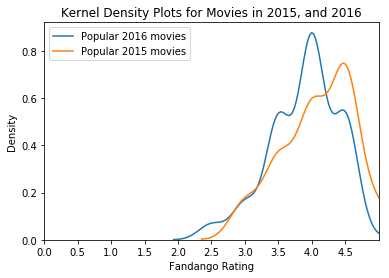

In [23]:
#Let's create two kernel density plots on the same graph for movies in 2015, and 2016
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

movies_2016 = Fandango_Movie_Ratings_16['fandango']
movies_2015 = Fandango_Movie_Ratings_15['Fandango_Stars']

sns.distplot(movies_2016, hist = False, label = 'Popular 2016 movies')
sns.distplot(movies_2015, hist = False, label = 'Popular 2015 movies')

plt.title("Kernel Density Plots for Movies in 2015, and 2016")
plt.ylabel('Density')
plt.xlabel('Fandango Rating')
plt.legend()

plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, step = 0.5))

plt.show()

There are few notes that you need to take when looking at these plots. All two graphs roughly resemble a normal distribution curve. As you can see the orange curve is skewed to the right compared to the blue curve and it peaks around 4.5 Fandango rating. This means that there are many movies in 2015 that are rated 4.5 Fandango rating. What is more interesting is that the blue curve has a shark peak at 4.0, which means that there are many more movies in 2016 that have an approximate Fandango rating of 4.0, compared to the number of movies in 2015 that are rated 4.5. By looking at these plots, we may conclude that there is a change between Fandango's rating for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

For further analysis, let us examine the relative frequency distribution tables of the two distribution:

In [22]:
#Create dictionaries that represent absolute frequecy distribution tables.

movies_2015_absolute_frequency = {2.5: 0, 3.0: 0, 3.5: 0, 4.0: 0, 4.5: 0, 5.0: 0}
movies_2016_absolute_frequency = {2.5: 0, 3.0: 0, 3.5: 0, 4.0: 0, 4.5: 0, 5.0: 0}

num_movies_2015 = 0
num_movies_2016 = 0

for rating in list(movies_2015):
    movies_2015_absolute_frequency[rating] += 1
    num_movies_2015 += 1
    
for rating in list(movies_2016):
    movies_2016_absolute_frequency[rating] += 1
    num_movies_2016 += 1

movies_2015_relative_frequency = {} 
movies_2016_relative_frequency = {}

for rating in [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
    #Values will be in percentages
    movies_2015_relative_frequency[rating] = ( movies_2015_absolute_frequency[rating] / num_movies_2015 ) * 100
    movies_2016_relative_frequency[rating] = ( movies_2016_absolute_frequency[rating] / num_movies_2016 ) * 100
    
#Create relative frequency tables.
table_2015 = pd.DataFrame.from_dict(movies_2015_relative_frequency, 
                                    orient = 'index', 
                                    columns = ['Relative Frequency for movies in 2015 (%)'])

table_2016 = pd.DataFrame.from_dict(movies_2016_relative_frequency, 
                                    orient = 'index', 
                                    columns = ['Relative Frequency for movies in 2016 (%)'])

table_2016.index.name = 'Fandango Rating'
table_2015.index.name = 'Fandango Rating'

#Combine two tables then display the result

table_2015_2016 = pd.concat([table_2015, table_2016], axis = 1)
table_2015_2016


,Relative Frequency for movies in 2015 (%),Relative Frequency for movies in 2016 (%)
Fandango Rating,,
2.5,0.000000,3.141361
3.0,8.527132,7.329843
3.5,17.829457,24.083770
4.0,28.682171,40.314136
4.5,37.984496,24.607330
5.0,6.976744,0.523560


From this table, it is much clearer to see that there is a distribution difference between the two data samples (movies from 2015 and movies from 2016). In terms of its relative frequency, the proportion of movies in 2016 that are rated 4.5 to 5.0 is lesser compared to the proportion of movies in 2015 that are rated 4.5 to 5.0. Additionally, there is a greater proportion of movies in 2016 that are rated 3.5 to 4.0 compared to the proportion of movies in 2015 that are rated 3.5 to 4.0. Therefore, we can conclude that movies in 2016 are rated lower than movies in 2015. The question now becomes by how much of it is rated differently.

Let us look at the mean median and mode of both popular movies in 2015 and 2016.

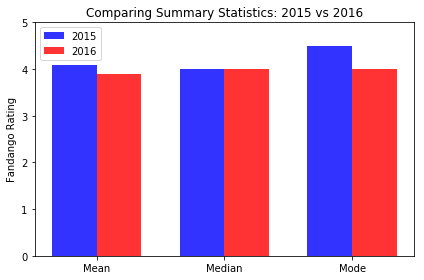

In [53]:
mean_rating_movies_2015 = movies_2015.mean()
median_rating_movies_2015 = movies_2015.median()
mode_rating_movies_2015 = movies_2015.mode()[0]

mean_rating_movies_2016 = movies_2016.mean()
median_rating_movies_2016 = movies_2016.median()
mode_rating_movies_2016 = movies_2016.mode()[0]

# data to plot
n_groups = 3
means_frank = (mean_rating_movies_2015, median_rating_movies_2015, mode_rating_movies_2015)
means_guido = (mean_rating_movies_2016, median_rating_movies_2016, mode_rating_movies_2016)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha = opacity,
                 color = 'blue',
                 label = '2015')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha = opacity,
                 color = 'red',
                 label = '2016')
 
plt.ylabel('Fandango Rating')
plt.ylim(0, 5)
plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.xticks(index + bar_width/2, ('Mean', 'Median', 'Mode'))
plt.legend()
 
plt.tight_layout()
plt.show()

The median for both groups are the same. The mode for popular movies in 2015 is higher than the mode for popular movies in 2016, and the mean for popular movies in 2015 is slightly higher than the mean for popular movies in 2016. From this we can conclude that, on averange, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015. The reason why there is a significant difference between the modes is because in 2015, there are many movies that are rated highly (4.0 to 5.0) compared to 2016. This is due to the fact that there was an error in the rating system prior to Hickey's analysis. At 2016, the mean, median, and mode are similar so if you look at the KDE plot, it should rougly resemble a normal distribution curve, so it might indicate a significant change to Fandango's rating system.